### 数据预处理

In [1]:
stop_path = 'data/stopwords.txt'
stopwords = open(stop_path).readlines()
stopwords = [word.strip() for word in stopwords]
len(stopwords)

767

In [2]:
data_path = 'data/射雕英雄传.txt'
docs = open(data_path).readlines()
docs = [doc.strip() for doc in docs if doc.strip() != '']

In [3]:
# 总行数
print(len(docs), sum([len(doc) for doc in docs]))
# 总字数
print(len(max(docs, key=len)), max(docs, key=len))

8611 892286
507 郭靖点头道：“对，幸亏大哥聪明，料到了这着，倘若是我，定是上了他们的大当。”周伯通摇头道：“说到聪明伶俐，天下又有谁及得上黄老邪的？只不知他用甚么法子，居然找到了一个跟他一般聪明的老婆。那时候黄家嫂子微微一笑，道：‘周大哥，你号称老顽童，人可不胡涂啊，你怕我刘备借荆州是不是？我就在这里坐着瞧瞧，看完了马上还你，也不用到天黑，你不放心，在旁边守着我就是。’“我听她这么说，就从怀里取出经书，递了给她。黄家嫂子接了，走到一株树下，坐在石上翻了起来。黄老邪见我神色之间总是有点提心吊胆，说道：‘老顽童，当世之间，有几个人的武功胜得过你我两人？’我道：‘胜得过你的未必有。胜过我的，连你在内，总有四五人罢！’黄老邪笑道：‘那你太捧我啦，东邪、西毒、南帝、北丐四个人，武功各有所长，谁也胜不了谁。欧阳锋既给你师哥破去了“蛤蟆功”’，那么十年之内，他是比兄弟要逊一筹的了。还有个铁掌水上飘裘千仞，听说武功也很了得，那次华山论剑他却没来，但他功夫再好，也未必真能出神入化。老顽童，你的武功兄弟决计不敢小看了，除了这几个人，武林中数到你是第一。咱俩联起手来，并世无人能敌。’我道：‘那自然！’黄老邪道：‘所以啊，你何必心神不定？


In [4]:
import jieba

all_docs = []
for doc in docs:
    result = []
    words = jieba.cut(doc)
    for word in words:
        if word != '' and word != '\u3000' and word not in stopwords:
            result.append(word)
    all_docs.append(result)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.730 seconds.
Prefix dict has been built succesfully.


In [5]:
dataset = [' '.join(doc) for doc in all_docs]
dataset[:10]

['第一回 风雪 惊变 1',
 '钱塘江 浩浩 江水 日日夜夜 无穷 无休 临安 牛家村 绕过 东 流入 海',
 '江畔 一排 数十株 乌 柏树 叶子 似 火烧 般红 正是 八月 天时 村前村后 野草 刚 起始 变黄 一抹 斜阳 映照 之下 更增 几分 萧索 两株 大 松树 下 围着 一堆 村民 男男女女 十几个 小孩 正自 聚精会神 听 瘦削 老者 说话',
 '说话 人 五十 岁 年纪 一件 青布 长袍 早洗 褪成 蓝灰色 只 听 两片 梨花 木板 碰 几下 左手 中 竹棒 一面 小 羯鼓 上 敲起 连声 唱道 小桃 无主自 开花 烟草 茫茫 带 晚鸦 几处 败垣围 故井 向来',
 '说话 人 木板 敲 几下 说道 这首 七言诗 说 兵火 过后 原来 家家户户 都 变成 断 墙 残瓦 破败 之地 小人 刚才 说 叶老汉 一家 四口 悲欢离合 聚 散 散 聚 他四人 金兵 冲散 好容易 再 团聚 欢天喜地 回到 故乡 却 见 房屋 已 金兵 烧 干干净净 无可奈何 只得 去 汴梁 想 觅 生计 不 料想 天有不测风云 人有旦夕祸福 他四人 刚进 汴梁 城 迎面 便 过来 一队 金兵 带兵 头儿 一双 三角 眼觑 过去 见 叶三姐 生 美貌 跳 下马 当即 一把 抱住 哈哈大笑 便 放上 马鞍 说道 小姑娘 回家 服侍 老爷 叶三姐 肯 拼命 挣扎 那金兵 长官 喝道 不肯 便 杀 父母 兄弟 提起 狼牙棒 棒打 叶四郎 头上 登时 脑浆 迸裂 一命呜呼 正是 阴世 新添 枉死鬼 阳间 不见 少年人',
 '叶老汉 妈妈 呆 扑 上去 搂住 儿子 死尸 放声大哭',
 '长官 提起 狼牙棒 一棒 都 帐 叶三姐 却 不 啼哭 说道 长官 休 凶恶 回家 便 长官 大喜 叶三姐 带得 回家 不料 叶三姐 觑 不防 突然 抢步 过去 拔出 长官 腰刀 对准 心口 一刀 刺 过去 说时迟 那时快 一刀 刺去 眼见 便 可报 父母 兄弟 大仇 不料 长官 久经 战阵 武艺 精熟 顺手 一推 叶三姐 登时 摔 出去 长官 刚 骂 一声 小 贱人 叶三姐 已 举起 钢刀 脖子 中一勒 可怜 花容月貌 无双 女 惆怅 芳魂 赴 九泉',
 '说 一段 唱 一段 只 听 众 村民 无不 咬牙切齿 愤怒 叹息',
 '那人 道 众 位 看官 常言道 好 人 切莫 欺心 举头 三

### 聚类

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 关键词提取

In [7]:
##### 可调整参数 #####
true_k = 10
n_features = 10000
max_iter = 10000
##### 可调整参数 #####

In [8]:
"""
max_df is used for removing terms that appear too frequently.
For example:
max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".

min_df is used for removing terms that appear too infrequently.
For example:
min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents".
"""

vectorizer = TfidfVectorizer(max_df=0.5, max_features=n_features, min_df=100, use_idf=True)
X = vectorizer.fit_transform(dataset)

# K-Means
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=max_iter, n_init=1, verbose=False)
model.fit(X)

print('聚类关键词:')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s |' % terms[ind], end='')
    print()

print('聚类分布:')
clusters = list(model.predict(X))
print(dict([(i, clusters.count(i)) for i in clusters]))

print('聚类距离:')
score = -model.score(X) / X.shape[0] # sum of distances of samples to their closest cluster center.
print(score)

聚类关键词:
Cluster 0: 蒙古 | 铁木真 | 郭靖 | 成吉思汗 | 拖雷 | 大汗 | 知道 | 完颜洪烈 | 华筝 | 此时 |
Cluster 1: 黄药师 | 欧阳锋 | 郭靖 | 周伯通 | 洪七公 | 桃花岛 | 武功 | 女儿 | 说道 | 功夫 |
Cluster 2: 郭靖 | 说道 | 欧阳锋 | 洪七公 | 师父 | 周伯通 | 只见 | 心中 | 两人 | 一声 |
Cluster 3: 有人 | 郭靖 | 只见 | 黄蓉 | 两人 | 之中 | 众人 | 正是 | 陆冠英 | 周伯通 |
Cluster 4: 丘处机 | 柯镇恶 | 王处一 | 彭连虎 | 江南 | 武功 | 马钰 | 朱聪 | 杨铁心 | 韩宝驹 |
Cluster 5: 包惜弱 | 杨铁心 | 完颜康 | 心中 | 不知 | 脸上 | 完颜洪烈 | 爹爹 | 之中 | 心想 |
Cluster 6: 郭靖见 | 郭靖 | 黄蓉 | 心中 | 一招 | 不知 | 只见 | 说道 | 当下 | 不禁 |
Cluster 7: 欧阳克 | 洪七公 | 黄蓉 | 欧阳锋 | 郭靖 | 说道 | 心中 | 身子 | 两人 | 一声 |
Cluster 8: 黄蓉道 | 郭靖道 | 爹爹 | 郭靖 | 欧阳锋 | 黄蓉 | 师父 | 洪七公 | 知道 | 说道 |
Cluster 9: 黄蓉 | 郭靖 | 洪七公 | 两人 | 只见 | 欧阳锋 | 说道 | 心中 | 靖哥哥 | 一声 |
聚类分布:
{2: 5536, 3: 146, 5: 132, 4: 336, 0: 165, 6: 100, 1: 506, 9: 989, 8: 376, 7: 325}
聚类距离:
0.8834679361703248


### 降维可视化

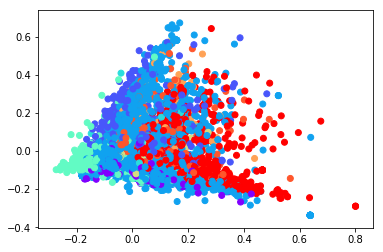

In [9]:
pca = PCA(n_components=2) # 降成两维
newdata = pca.fit_transform(X.toarray())

colors = cm.rainbow(np.linspace(0, 1, true_k)) # 10 种颜色

x = []
y = []
c = []

for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    c.append(colors[clusters[i]])

plt.scatter(x, y, color=c)
plt.savefig('docs/pca.png')
plt.show()